In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import wordnet
from nltk.corpus import stopwords
from nltk import PorterStemmer, WordNetLemmatizer
import seaborn as sns
from textblob import TextBlob
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [135]:
print('Enter filename please on which you want to perform sentiment Analysis and LDA')
filename = input()
filename = filename + ".csv"
filename

Enter filename please on which you want to perform sentiment Analysis and LDA
Dance


'Dance.csv'

In [136]:
df1 = pd.read_csv(f'/content/drive/MyDrive/Datasets/LDA dataset/{filename}')

In [137]:
df1.head()

,url,title,star,address,url_img,time_end,act_int,about_author,author_time,author_name,author_img,comment_all,price,comment_count
0,https://www.airbnb.com//experiences/2583159?ch...,Chai Tea Masterclass-(VEGAN Friendly),NaN,"Jaipur, India· Part ofAirbnb Online Experiences",['https://z1.muscache.cn/im/pictures/lombard/M...,30 mins · Hosted in English,✅ Anyone can make Chai (Even a BEGINNER)✅VEGAN...,I'm Jd a true Delhi-ite . My family have a res...,Host on Airbnb since 2017,"Meet your Host, Jd",https://z1.muscache.cn/im/pictures/user/315d01...,"[{'time': 'February 2022', 'name': 'Cara', 'co...",From ￥86/person,189/189
1,https://www.airbnb.com//experiences/2502892?ch...,K-pop dance class with K-pop choreographers,NaN,"서울특별시, South Korea· Part ofAirbnb Online Exper...",['https://z1.muscache.cn/im/pictures/lombard/M...,60 mins · Hosted in Korean and English,Welcome to the world of K-pop dance!Wherever y...,I am a professional choreographer who worked a...,Host on Airbnb since 2017,"Meet your Host, 영재",https://z1.muscache.cn/im/pictures/user/b56d3e...,"[{'time': 'February 2022', 'name': 'David', 'c...",From ￥104/person,95/95
2,https://www.airbnb.com//experiences/1654247?ch...,Tango Intro by Argentinian Experts,NaN,"Caba, Argentina· Part ofAirbnb Online Experiences",['https://z1.muscache.cn/pictures/lombard/MtTe...,"60 mins · Hosted in English, Spanish, French, ...",Visit Buenos Aires from your living room to ex...,My name is Luciana and I was born and raised i...,Host on Airbnb since 2015,"Meet your Host, Luciana",https://z1.muscache.cn/im/pictures/user/27a70d...,"[{'time': 'February 2022', 'name': 'Jane', 'co...",From ￥95/person,458/458
3,https://www.airbnb.com//experiences/1684186?ch...,Dance Salsa and Latin Music From Scratch,NaN,"Bogotá, Colombia· Part ofAirbnb Online Experie...",['https://z1.muscache.cn/im/pictures/lombard/M...,60 mins · Hosted in Spanish and English,"YOUR HELP COUNTS: By booking this experience, ...","My name is Germán David, I started to dance Sa...",Host on Airbnb since 2016,"Meet your Host, Germán David",https://z1.muscache.cn/im/pictures/user/fe464d...,"[{'time': 'February 2022', 'name': 'Vera', 'co...",From ￥125/person,479/479
4,https://www.airbnb.com//experiences/1672027?ch...,Cuban Salsa Dance Class and Latin Party,NaN,"Puerto Vallarta, Mexico· Part ofAirbnb Online ...",['https://z1.muscache.cn/pictures/lombard/MtTe...,"75 mins · Hosted in English, Spanish, French, ...",Enter the vibrant Latin night scene in Puerto ...,"I am Israel and I live in Puerto Vallarta, a c...",Host on Airbnb since 2016,"Meet your Host, Israel",https://z1.muscache.cn/im/pictures/user/598840...,"[{'time': 'February 2022', 'name': 'Adam', 'co...",From ￥73/person,82/82


In [138]:
all_lists = df1['comment_all'].apply(lambda x : ast.literal_eval(x))

In [105]:
all_lists[0]

[{'comment': "This was a really fun class with a lot of great information. I enjoyed learning the history and how I can personalize my chai.  I look forward to trying more of JD's classes",
  'name': 'Cara',
  'reply': {},
  'time': 'February 2022'},
 {'comment': 'The class was conducted in a very informative and friendly manner. The host was extremely responsive to private messages, and answered many questions we had regarding a private event we wanted to reserve. During the session the host engaged the participants in questions. He shared the history, and clearly demonstrated how to make Masala Chai and offered suggestions for substitutes. We received positive responses from everyone who joined.',
  'name': 'Angie',
  'reply': {},
  'time': 'February 2022'},
 {'comment': 'JD was such an excellent host. He did a great job of teaching the recipe + telling the story of tea + getting to know each person in only 30 min. The time just flew by and in the end I was drinking delicious, restau

In [106]:
comments = []
for lis in all_lists:
    com = [x['comment'] for x in lis]
    comments.append(com)

In [107]:
all_comments = []
for com in comments:
  for co in com:
    x = nltk.sent_tokenize(co)
    all_comments.append(x)

In [108]:
all_comments = [sub for item in all_comments for sub in item]

In [109]:
len(all_comments)

9044

In [110]:
import re
def clean_text(text):
  text = str(text)
  text = re.sub('[^a-zA-Z]', " ", text) #remove punctuations and numbers
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # Single character removal
  text = re.sub(r'\s+', " ", text) #remove extra spaces
  text = text.replace("ain't", "am not").replace("aren't", "are not")
  text = ' '.join(tex.lower() for tex in text.split(' ')) # Lowering cases
  sw = stopwords.words('english')
  text = ' '.join(tex for tex in text.split() if tex not in sw) #removing stopwords
  #sentence = ' '.join(text.lemmatize() for text in sentence.split()) #lemmatization
  return text
  #print(text)


In [111]:
for i in range(len(all_comments)):
  all_comments[i] = clean_text(all_comments[i])
all_comments

['really fun class lot great information',
 'enjoyed learning history personalize chai',
 'look forward trying jd classes',
 'class conducted informative friendly manner',
 'host extremely responsive private messages answered many questions regarding private event wanted reserve',
 'session host engaged participants questions',
 'shared history clearly demonstrated make masala chai offered suggestions substitutes',
 'received positive responses everyone joined',
 'jd excellent host',
 'great job teaching recipe telling story tea getting know person min',
 'time flew end drinking delicious restaurant quality chai',
 'jd provides engaging inclusive experience skillful storytelling delicious recipe chai presented clear pictures overhead leads step step process making chai',
 'yummy',
 'great experience',
 'fun easy',
 'virtual event extended family get together perfect',
 'jd also allowed us stay use zoom well class ended family social time really appreciated',
 'first experience guest lo

In [112]:
print(len(all_comments))
all_comments = [x for x in all_comments if x]
print(len(all_comments))

9044
8809


In [113]:
all_comments

['really fun class lot great information',
 'enjoyed learning history personalize chai',
 'look forward trying jd classes',
 'class conducted informative friendly manner',
 'host extremely responsive private messages answered many questions regarding private event wanted reserve',
 'session host engaged participants questions',
 'shared history clearly demonstrated make masala chai offered suggestions substitutes',
 'received positive responses everyone joined',
 'jd excellent host',
 'great job teaching recipe telling story tea getting know person min',
 'time flew end drinking delicious restaurant quality chai',
 'jd provides engaging inclusive experience skillful storytelling delicious recipe chai presented clear pictures overhead leads step step process making chai',
 'yummy',
 'great experience',
 'fun easy',
 'virtual event extended family get together perfect',
 'jd also allowed us stay use zoom well class ended family social time really appreciated',
 'first experience guest lo

In [114]:
class sentiment_analysis:
  def __init__(self, all_comments):
    self.sentiment = 0
    self.sentiment_list = []
    self.all_comments = all_comments

  def getSubjectivity(self, text):
   return TextBlob(str(text)).sentiment.subjectivity
  
  #Create a function to get the polarity
  def getPolarity(self, text):
    return TextBlob(str(text)).sentiment.polarity

  def getAnalysis(self):
    self.sentiment_list = []
    for comment in self.all_comments:
      subjectivity = self.getSubjectivity(comment)
      polarity = self.getPolarity(comment)
      if polarity < 0:
        self.sentiment = 'Negative'
      elif polarity == 0:
        self.sentiment = 'Neutral'
      else:
        self.sentiment = 'Positive'  

      self.sentiment_list.append(self.sentiment)
    return self.sentiment_list


In [115]:
model = sentiment_analysis(all_comments)

In [116]:
predictions = model.getAnalysis()

In [117]:
len(all_comments)

8809

In [118]:
len(predictions)

8809

In [119]:
sentiment_dataframe = pd.DataFrame({'tweets': all_comments, 'sentiments':predictions})

In [120]:
sentiment_dataframe['sentiments'].value_counts()

Positive    6619
Neutral     1983
Negative     207
Name: sentiments, dtype: int64

# **LDA**

In [22]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1061cfd74a11d53dc83ad486fe662e58f20ab051768ad15c3205091c6202b5b9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [139]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
all_comments = []
for item in all_lists:
  for comments in item:
    all_comments.append(comments['comment'])

In [141]:
all_comments[0]

"This was a really fun class with a lot of great information. I enjoyed learning the history and how I can personalize my chai.  I look forward to trying more of JD's classes"

In [142]:
len(all_comments)

2815

In [143]:
import re
lemma_ = WordNetLemmatizer()
def clean_text(text):
  text = str(text)
  text = re.sub('[^a-zA-Z]', " ", text) #remove punctuations and numbers
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # Single character removal
  text = re.sub(r'\s+', " ", text) #remove extra spaces
  text = text.replace("ain't", "am not").replace("aren't", "are not")
  text = ' '.join(tex.lower() for tex in text.split(' ')) # Lowering cases
  sw = stopwords.words('english')
  text = ' '.join(tex for tex in text.split() if tex not in sw) #removing stopwords
  text = ' '.join(lemma_.lemmatize(x) for x in text.split()) #lemmatization
  tokens = text.split()
  return text, tokens
  #print(text)


In [144]:
tokens = []
for i in range(len(all_comments)):
  all_comments[i], tok = clean_text(all_comments[i])
  tokens.append(tok)

In [145]:
all_comments[1] 

'class conducted informative friendly manner host extremely responsive private message answered many question regarding private event wanted reserve session host engaged participant question shared history clearly demonstrated make masala chai offered suggestion substitute received positive response everyone joined'

In [146]:
print(tokens[1])

['class', 'conducted', 'informative', 'friendly', 'manner', 'host', 'extremely', 'responsive', 'private', 'message', 'answered', 'many', 'question', 'regarding', 'private', 'event', 'wanted', 'reserve', 'session', 'host', 'engaged', 'participant', 'question', 'shared', 'history', 'clearly', 'demonstrated', 'make', 'masala', 'chai', 'offered', 'suggestion', 'substitute', 'received', 'positive', 'response', 'everyone', 'joined']


In [147]:
dictionary = corpora.Dictionary(tokens)
doc_term_matrix = [dictionary.doc2bow(x) for x in tokens]

In [86]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [148]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=50, random_state=100, chunksize=1000, passes=20, iterations=100)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [149]:
lda_model.print_topics()

[(17,
  '0.032*"beautiful" + 0.030*"dance" + 0.028*"party" + 0.026*"mix" + 0.023*"girl" + 0.023*"friend" + 0.022*"hearing" + 0.020*"treat" + 0.017*"prepared" + 0.016*"immediately"'),
 (35,
  '0.131*"really" + 0.076*"enjoyed" + 0.054*"experience" + 0.053*"dance" + 0.037*"great" + 0.030*"fun" + 0.027*"lot" + 0.025*"also" + 0.024*"u" + 0.022*"culture"'),
 (9,
  '0.080*"carnival" + 0.049*"experience" + 0.041*"join" + 0.038*"private" + 0.036*"rio" + 0.033*"booked" + 0.032*"dandara" + 0.029*"group" + 0.019*"better" + 0.019*"expected"'),
 (33,
  '0.125*"latoya" + 0.063*"dance" + 0.053*"fun" + 0.042*"jamaica" + 0.039*"jamaican" + 0.036*"culture" + 0.034*"history" + 0.028*"much" + 0.024*"great" + 0.021*"learn"'),
 (43,
  '0.139*"feel" + 0.100*"made" + 0.057*"comfortable" + 0.055*"u" + 0.050*"like" + 0.039*"class" + 0.036*"dance" + 0.036*"even" + 0.032*"dancer" + 0.023*"left"'),
 (26,
  '0.043*"clase" + 0.037*"mi" + 0.029*"gracias" + 0.026*"organized" + 0.025*"cool" + 0.024*"te" + 0.022*"muchas"

In [150]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.227233 -0.129669       1        1  6.534512
15    -0.167483  0.093755       2        1  4.467703
35    -0.206826  0.038843       3        1  4.352733
24    -0.074800  0.207816       4        1  3.662185
41    -0.130482  0.163839       5        1  3.623792
13    -0.150849  0.102766       6        1  3.619864
22    -0.141440  0.071371       7        1  3.320527
49     0.199222 -0.039133       8        1  2.885015
44    -0.130140 -0.170865       9        1  2.843225
40    -0.113970  0.028628      10        1  2.770093
6     -0.111566 -0.106876      11        1  2.617128
46    -0.119170 -0.087346      12        1  2.603664
43    -0.065052  0.169661      13        1  2.424932
34    -0.144802 -0.028424      14        1  2.409150
36    -0.108684  0.066704      15        1  2.237969
21     0.226661 -0.006337      16        1  2.197730
47    -0.015201 -0.010193      17        1  2.152799
12    -0.065948  0.124169      18        1  2.019147
38    -0.112376 -0.002404      19        1  1.943548
5     -0.012392  0.080113      20        1  1.922618
0     -0.088638 -0.037209      21        1  1.921605
33    -0.060355 -0.028976      22        1  1.908864
7     -0.074940 -0.099754      23        1  1.889257
32    -0.096289 -0.129042      24        1  1.880028
1     -0.060522 -0.148665      25        1  1.871093
23     0.058462 -0.006491      26        1  1.805580
29    -0.027206  0.142264      27        1  1.799516
19    -0.006272  0.079171      28        1  1.717513
8     -0.058942 -0.142348      29        1  1.668908
48    -0.053158 -0.095269      30        1  1.628081
45    -0.003361  0.076988      31        1  1.583023
3     -0.045562 -0.045872      32        1  1.542516
9      0.031650 -0.117620      33        1  1.509807
42    -0.009410 -0.100922      34        1  1.493342
31    -0.048631  0.030980      35        1  1.440393
4      0.018454 -0.073911      36        1  1.222685
27     0.037629  0.037103      37        1  1.199009
30     0.102025  0.127267      38        1  1.118545
37     0.197060  0.025218      39        1  1.002989
16     0.215028  0.010501      40        1  0.979730
28     0.132067 -0.014844      41        1  0.954659
17     0.079479 -0.015826      42        1  0.949141
2      0.110374  0.082458      43        1  0.943241
39     0.057367 -0.010808      44        1  0.929328
25     0.250897 -0.006714      45        1  0.842798
14     0.204304 -0.016291      46        1  0.777428
10     0.247933  0.019786      47        1  0.770112
18     0.149109 -0.076139      48        1  0.730396
26     0.214334 -0.022393      49        1  0.674697
20     0.199647 -0.009060      50        1  0.637383, topic_info=             Term         Freq        Total Category  logprob  loglift
194     recommend   606.000000   606.000000  Default  30.0000  30.0000
67     experience  1450.000000  1450.000000  Default  29.0000  29.0000
1042        tango   561.000000   561.000000  Default  28.0000  28.0000
5           great  1135.000000  1135.000000  Default  27.0000  27.0000
4             fun  1282.000000  1282.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
4535         kati     3.145264    12.777223  Topic50  -4.7143   3.6538
713   personality     3.679548    28.546785  Topic50  -4.5574   3.0068
1716          con     2.610010    41.295711  Topic50  -4.9008   2.2942
537          back     2.301359    42.908449  Topic50  -5.0267   2.1300
4728      marcelo     2.160787   120.535615  Topic50  -5.0897   1.0341

[2675 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1140      1  0.228482  ability
1140     12  0.456964  ability
1140     17  0.137089  ability
1140     41  0.091393  ability
266       4  0.010712     able
...     ...       ...      ...
96       13  0.019541     zoom
96       23  0.605759     zoom
9

In [151]:
len(doc_term_matrix)

2815

In [152]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=len(doc_term_matrix)))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -7.255516136913542

Coherence Score:  0.4386515117082417


In [153]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [154]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokens, start=2, limit=20, step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

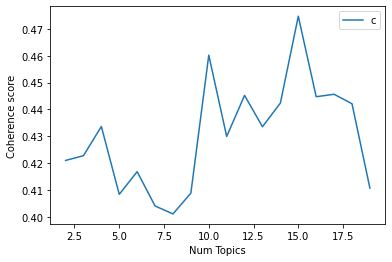

In [155]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [156]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.421
Num Topics = 3  has Coherence Value of 0.4227
Num Topics = 4  has Coherence Value of 0.4336
Num Topics = 5  has Coherence Value of 0.4084
Num Topics = 6  has Coherence Value of 0.4168
Num Topics = 7  has Coherence Value of 0.404
Num Topics = 8  has Coherence Value of 0.401
Num Topics = 9  has Coherence Value of 0.4088
Num Topics = 10  has Coherence Value of 0.4602
Num Topics = 11  has Coherence Value of 0.4299
Num Topics = 12  has Coherence Value of 0.4452
Num Topics = 13  has Coherence Value of 0.4335
Num Topics = 14  has Coherence Value of 0.4424
Num Topics = 15  has Coherence Value of 0.4747
Num Topics = 16  has Coherence Value of 0.4447
Num Topics = 17  has Coherence Value of 0.4456
Num Topics = 18  has Coherence Value of 0.4421
Num Topics = 19  has Coherence Value of 0.4106


In [100]:
# Select the model and print the topics
optimal_model = model_list[20]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20)

[(15,
  '0.039*"de" + 0.033*"la" + 0.029*"experiencia" + 0.026*"que" + 0.023*"muy" + 0.020*"el" + 0.017*"un" + 0.016*"con" + 0.016*"en" + 0.015*"una" + 0.013*"para" + 0.011*"gracias" + 0.011*"polished" + 0.011*"del" + 0.010*"simpatia" + 0.010*"clue" + 0.010*"excelente" + 0.009*"ricardo" + 0.008*"fue" + 0.008*"los"'),
 (12,
  '0.034*"birthday" + 0.031*"booked" + 0.031*"experience" + 0.026*"ana" + 0.021*"loved" + 0.020*"elle" + 0.020*"private" + 0.018*"friend" + 0.015*"fun" + 0.015*"event" + 0.015*"session" + 0.015*"party" + 0.014*"group" + 0.014*"husband" + 0.013*"time" + 0.013*"enjoyed" + 0.011*"everyone" + 0.011*"really" + 0.011*"company" + 0.011*"great"'),
 (11,
  '0.091*"experience" + 0.061*"great" + 0.049*"host" + 0.036*"wonderful" + 0.028*"elle" + 0.018*"really" + 0.017*"mezcal" + 0.015*"enjoyed" + 0.014*"family" + 0.013*"thoroughly" + 0.011*"excellent" + 0.011*"thank" + 0.011*"played" + 0.010*"warm" + 0.009*"fun" + 0.009*"friendly" + 0.008*"lesson" + 0.008*"history" + 0.008*"frie

In [101]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.109673  0.111069       1        1  12.365537
20    -0.077266  0.074514       2        1   8.388535
5     -0.090452  0.057311       3        1   8.270484
1     -0.029959 -0.044842       4        1   7.645522
6     -0.086399  0.091038       5        1   6.245270
3     -0.074155 -0.108920       6        1   5.853261
16    -0.109183 -0.096654       7        1   5.493200
12    -0.025444 -0.104299       8        1   4.406266
10    -0.015136  0.111209       9        1   4.172978
8     -0.027156 -0.176828      10        1   4.100974
11    -0.046384 -0.039841      11        1   3.919929
0     -0.096910  0.032006      12        1   3.806148
9     -0.047302 -0.044360      13        1   3.667881
13    -0.031349  0.086642      14        1   3.353286
18    -0.075185  0.050774      15        1   3.250327
21     0.018880  0.003507      16        1   2.711615
15     0.469523  0.034110      17        1   2.403339
19     0.016312 -0.055470      18        1   2.385651
2     -0.000210  0.051535      19        1   2.063788
17     0.117560 -0.068857      20        1   1.953101
7      0.169322 -0.086009      21        1   1.826647
14     0.150563  0.122366      22        1   1.716260, topic_info=          Term         Freq        Total Category  logprob  loglift
5847      beer  3768.000000  3768.000000  Default  30.0000  30.0000
1582    coffee  5334.000000  5334.000000  Default  29.0000  29.0000
202      class  4025.000000  4025.000000  Default  28.0000  28.0000
118   cocktail  2428.000000  2428.000000  Default  27.0000  27.0000
1384     woman  1172.000000  1172.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
64         way    45.580234  1444.961658  Topic22  -4.8202   0.6087
399       book    40.097534   552.943568  Topic22  -4.9483   1.4411
44       great    49.488970  8251.924082  Topic22  -4.7379  -1.0514
195      thank    40.665918  1134.148425  Topic22  -4.9343   0.7368
272        one    39.802634  1674.178013  Topic22  -4.9557   0.3259

[1497 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
5646      1  0.978765    ab
100       1  0.274754  able
100       2  0.021135  able
100       3  0.087791  able
100       5  0.130061  able
...     ...       ...   ...
310      13  0.012735  zoom
310      14  0.028653  zoom
310      15  0.003184  zoom
310      16  0.003184  zoom
310      21  0.041388  zoom

[5227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 21, 6, 2, 7, 4, 17, 13, 11, 9, 12, 1, 10, 14, 19, 22, 16, 20, 3, 18, 8, 15])